In [107]:
##Code by Agney Patel
##https://www.agneypatel.com
##Copyright 2019


##Files directory
## - Regression.ipynb
## - train.csv
## - test.csv
## - lr.csv
## - rf.csv

#### Import

In [1]:
# Importing all the required libraries and frameworks for both ML models

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import metrics
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
from warnings import filterwarnings
filterwarnings('ignore')

#### Data cleaning and preparation

In [3]:
train_initial_data = pd.read_csv('train.csv', header=0)
print(train_initial_data)

              x0         x1         x2         x3         x4         x5  \
0       0.963686   6.627185 -45.224008   9.477531  -3.216532  13.216874   
1      -1.770062 -23.610459  -0.964003 -31.981497 -10.294599 -10.240251   
2       9.962401  -8.349849  23.248891 -24.196879   8.937480  10.965000   
3      -5.780709 -25.261584   1.383115 -11.786929   7.993078 -11.245752   
4       1.211541   1.119963   7.512938  21.987312  -5.155392  10.339416   
5      11.251127  13.666299  11.974221 -61.514219 -13.996542  11.710528   
6      13.495903  -1.359965   0.516408 -47.592789 -19.588067  10.024329   
7      -1.401653   8.597255   9.242360 -27.486118 -10.079713  -9.675179   
8      -3.305895 -26.651508  -3.719304  30.501428 -24.690505 -11.161201   
9      18.971037  18.687158  16.357928   7.845066 -44.842760 -31.568009   
10      2.884795 -10.574751  -6.247858  -4.467028  17.721170  -0.734376   
11     21.129629  -9.777321  35.819645  36.052095 -58.806849  12.053767   
12      1.889979 -16.4120

In [4]:
test_initial_data = pd.read_csv('test.csv', header=0)
print(test_initial_data)

             x0         x1         x2         x3         x4         x5  \
0      0.519093  -4.606038  13.707586 -17.990903  12.873394  14.910935   
1    -12.357004  13.874141  14.052924  34.129247  34.511107  34.583336   
2      1.834922   2.665252 -44.873210  21.941920  10.102981   5.962249   
3     20.972483  11.548506 -40.924625 -35.296796 -35.253101 -14.601890   
4     -9.916044   5.509811  31.749288  -0.803916  -4.005098  20.912490   
5      7.850299   2.578549  15.643030 -78.780906  -4.350849  -9.924658   
6     -5.660765  11.609084   2.638298  15.863788 -23.785412  12.207610   
7    -16.418156   8.384618   4.656578 -16.229104  31.244572  12.835003   
8    -15.396414  -7.327446  46.822316 -40.048461  16.213587 -30.746906   
9     -0.068375  -7.508963 -17.279398  -2.219471 -15.044268 -12.814850   
10   -10.143172 -12.693708  27.144535 -14.416996  -9.396833  34.587697   
11   -15.247280  25.146813   4.922501  19.893368  13.455417 -10.013831   
12     0.900507 -26.199480  31.120284 

In [82]:
##-------------------------TRAIN--------------------------##
#Counts number of missing values in the dataset

#Total rows and coloumn
print(train_initial_data.shape)

# Count missing values
train_missing_values_count = train_initial_data.isnull().sum()

train_total_cells = np.product(train_initial_data.shape)
total_missing = train_missing_values_count.sum()

print("Train Total cells :", train_total_cells)
print("Train Number of missing cells :", total_missing)
print("Train Percent of missing cells :", (total_missing/train_total_cells) * 100)


##-------------------------TEST--------------------------##

#Counts number of missing values in the dataset

#Total rows and coloumn
print(test_initial_data.shape)

# Count missing values
test_missing_values_count = test_initial_data.isnull().sum()

test_total_cells = np.product(test_initial_data.shape)
total_missing = test_missing_values_count.sum()

print("Test Total cells :", test_total_cells)
print("Test Number of missing cells :", total_missing)
print("Test Percent of missing cells :", (total_missing/test_total_cells) * 100)

(40000, 101)
Train Total cells : 4040000
Train Number of missing cells : 806
Train Percent of missing cells : 0.01995049504950495
(10000, 100)
Test Total cells : 1000000
Test Number of missing cells : 194
Test Percent of missing cells : 0.0194


In [83]:
##-------------------------TRAIN--------------------------##
#Counts number of null values in the train dataset

#Total rows and coloumn
print(train_initial_data.shape)

#Drop null values
train_modified_data = train_initial_data.dropna()
print(train_modified_data.shape)

##-------------------------TEST--------------------------##
#Counts number of null values in the test dataset

#Total rows and coloumn
print(test_initial_data.shape)

#Drop null values
test_modified_data = test_initial_data.dropna()
print(test_modified_data.shape)

(40000, 101)
(39194, 101)
(10000, 100)
(9806, 100)


In [84]:
train_df = pd.DataFrame(train_modified_data)
# train_df.describe()

test_df = pd.DataFrame(test_modified_data)
# test_df.describe()

#### Below columns are in different data types which needs to be converted to float64 using feature engineering

#### x34 - Car Company - String
#### x35 - Days - String
#### x41 - Dollars - String
#### x45 - Percent - String
#### x68 - Month - String
#### x93 - Continent - String

In [85]:
##-------------------------TRAIN--------------------------##
#To lowercase
train_df['x34'] = train_df['x34'].apply(lambda x: " ".join(x.lower() for x in x.split()))
train_df['x35'] = train_df['x35'].apply(lambda x: " ".join(x.lower() for x in x.split()))
train_df['x68'] = train_df['x68'].apply(lambda x: " ".join(x.lower() for x in x.split()))
train_df['x93'] = train_df['x93'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#Remove punctuation
train_df['x34'] = train_df['x34'].str.replace('[^\w\s]','')
train_df['x35'] = train_df['x35'].str.replace('[^\w\s]','')
train_df['x68'] = train_df['x68'].str.replace('[^\w\s]','')
train_df['x93'] = train_df['x93'].str.replace('[^\w\s]','')

##-------------------------TEST--------------------------##

#To lowercase
test_df['x34'] = test_df['x34'].apply(lambda x: " ".join(x.lower() for x in x.split()))
test_df['x35'] = test_df['x35'].apply(lambda x: " ".join(x.lower() for x in x.split()))
test_df['x68'] = test_df['x68'].apply(lambda x: " ".join(x.lower() for x in x.split()))
test_df['x93'] = test_df['x93'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#Remove punctuation
test_df['x34'] = test_df['x34'].str.replace('[^\w\s]','')
test_df['x35'] = test_df['x35'].str.replace('[^\w\s]','')
test_df['x68'] = test_df['x68'].str.replace('[^\w\s]','')
test_df['x93'] = test_df['x93'].str.replace('[^\w\s]','')

In [86]:
##-------------------------TRAIN--------------------------##
train_df['x34'] = train_df['x34'].replace({'mercades':'mercedes'})

train_sort_x34 = train_df.x34.unique()
sorted(train_sort_x34)

train_df['x34'] = train_df['x34'].replace({'bmw':'1', 'chevrolet':'2', 'chrystler':'3', 'ford':'4', 'honda':'5',
                               'mercedes':'6','nissan':'7','tesla':'8','toyota':'9','volkswagon':'10'})

##-------------------------TEST--------------------------##
test_df['x34'] = test_df['x34'].replace({'mercades':'mercedes'})

test_sort_x34 = test_df.x34.unique()
sorted(test_sort_x34)

test_df['x34'] = test_df['x34'].replace({'bmw':'1', 'chevrolet':'2', 'chrystler':'3', 'ford':'4', 'honda':'5',
                               'mercedes':'6','nissan':'7','tesla':'8','toyota':'9','volkswagon':'10'})

In [87]:
##-------------------------TRAIN--------------------------##
train_df['x35'] = train_df['x35'].replace({'wed':'wednesday', 'thur':'thursday', 'thurday':'thursday', 'fri':'friday'})

train_sort_x35 = train_df.x35.unique()
sorted(train_sort_x35)

train_df['x35'] = train_df['x35'].replace({'monday':'1', 'tuesday':'2', 'wednesday':'3', 'thursday':'4', 'friday':'5'})

##-------------------------TEST--------------------------##
test_df['x35'] = test_df['x35'].replace({'wed':'wednesday', 'thur':'thursday', 'thurday':'thursday', 'fri':'friday'})

test_sort_x35 = test_df.x35.unique()
sorted(test_sort_x35)

test_df['x35'] = test_df['x35'].replace({'monday':'1', 'tuesday':'2', 'wednesday':'3', 'thursday':'4', 'friday':'5'})


In [88]:
##-------------------------TRAIN--------------------------##
train_df['x68'] = train_df['x68'].replace({'january':'jan', 'dev':'dec', 'july':'jul'})

train_sort_x68 = train_df.x68.unique()
sorted(train_sort_x68)

train_df['x68'] = train_df['x68'].replace({'jan':'1', 'feb':'2', 'mar':'3', 'apr':'4', 'may':'5',
                               'jun':'6','jul':'7','aug':'8','sept':'9','oct':'10','nov':'11','dec':'12'})

##-------------------------TEST--------------------------##
test_df['x68'] = test_df['x68'].replace({'january':'jan', 'dev':'dec', 'july':'jul'})

test_sort_x68 = test_df.x68.unique()
sorted(test_sort_x68)

test_df['x68'] = test_df['x68'].replace({'jan':'1', 'feb':'2', 'mar':'3', 'apr':'4', 'may':'5',
                               'jun':'6','jul':'7','aug':'8','sept':'9','oct':'10','nov':'11','dec':'12'})

In [89]:
##-------------------------TRAIN--------------------------##
train_df['x93'] = train_df['x93'].replace({'euorpe':'europe'})

train_sort_x93 = train_df.x93.unique()
sorted(train_sort_x93)

train_df['x93'] = train_df['x93'].replace({'america':'1', 'asia':'2', 'europe':'3'})

##-------------------------TEST--------------------------##
test_df['x93'] = test_df['x93'].replace({'euorpe':'europe'})

test_sort_x93 = test_df.x93.unique()
sorted(test_sort_x93)

test_df['x93'] = test_df['x93'].replace({'america':'1', 'asia':'2', 'europe':'3'})

In [90]:
##-------------------------TRAIN--------------------------##
train_df["x34"] = train_df.x34.astype(float)
train_df["x35"] = train_df.x35.astype(float)
train_df["x68"] = train_df.x68.astype(float)
train_df["x93"] = train_df.x93.astype(float)

##-------------------------TEST--------------------------##
test_df["x34"] = test_df.x34.astype(float)
test_df["x35"] = test_df.x35.astype(float)
test_df["x68"] = test_df.x68.astype(float)
test_df["x93"] = test_df.x93.astype(float)

In [91]:
##-------------------------TRAIN--------------------------##
#x41 modification

train_df['x41'] = train_df['x41'].str.replace('$', '')
train_df['x41'] = train_df['x41'].astype('float64')
# train_df['x41']

##-------------------------TEST--------------------------##
#x41 modification

test_df['x41'] = test_df['x41'].str.replace('$', '')
test_df['x41'] = test_df['x41'].astype('float64')
# test_df['x41']

In [92]:
##-------------------------TRAIN--------------------------##
#x45 modification

train_df['x45'] = pd.to_numeric(train_df['x45'].str.replace('%', ''))
train_df['x45'] = train_df['x45'].astype('float64')
train_df['x45'] = train_df['x45'].div(100)
# train_df['x45']

##-------------------------TEST--------------------------##
#x45 modification

test_df['x45'] = pd.to_numeric(test_df['x45'].str.replace('%', ''))
test_df['x45'] = test_df['x45'].astype('float64')
test_df['x45'] = test_df['x45'].div(100)
# test_df['x45']

#### Logistic Regression

In [93]:
x = train_modified_data.loc[:, train_modified_data.columns != 'y']
y = train_modified_data.loc[:, train_modified_data.columns == 'y']

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state=25)

In [95]:
rfe = RFE(train_logreg, 20)

train_logreg = LogisticRegression(solver='lbfgs')
train_logreg.fit(x_train,y_train)

y_pred=train_logreg.predict(x_test)

In [96]:
# from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[8931,  405],
       [ 935, 1488]])

Text(0.5, 257.44, 'Predicted label')

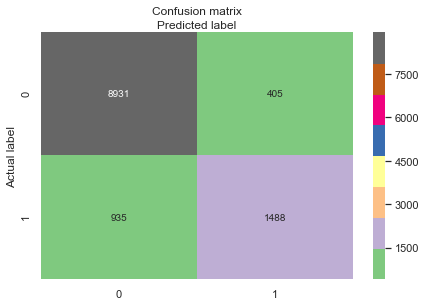

In [98]:
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Accent" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [99]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.886044731694872
Precision: 0.786053882725832
Recall: 0.6141147338010731


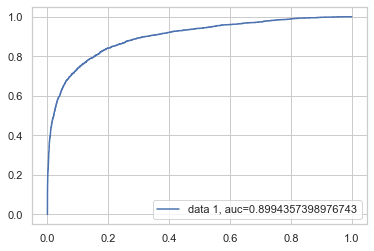

In [100]:
y_pred_proba = train_logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [101]:
#Export logistic regression prediction result with 10,000 rows

pd.DataFrame(y_pred)[:10000].to_csv("lr.csv", index=False, header=False)

#### Random Forest Regression

In [102]:
# from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)  
regressor.fit(x_train, y_train)  
y_pred = regressor.predict(x_test)

In [49]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.19873288544944298
Mean Squared Error: 0.07762748533038523
Root Mean Squared Error: 0.2786170944690674


##### n_estimators defines the number of trees in the random forest. We're testing whether there's decrease in MSE if there's increase in n_estimators value.

In [103]:
# from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=50, random_state=0)  
regressor.fit(x_train, y_train)  
y_pred = regressor.predict(x_test)

In [104]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1992635428182669
Mean Squared Error: 0.07940610596139128
Root Mean Squared Error: 0.2817908904868844


In [105]:
#Export Random Forest Regression Prediction Result

# import pandas as pd 
pd.DataFrame(y_pred)[:10000].to_csv("rf.csv", index=False, header=False)